# CSI5155 Machine Learning Assignment 2 - Summary Plots

This notebook serves the purpose to visualize the explanation on the selected classifiers from the previous notebook named `CSI5155 Assignment 2 - Kelvin Mock 300453668.ipynb`.

# Import Necessary Packages

In [1]:
import numpy as np;
import pandas as pd;
import os;
import random;
import constants;
from fileOrganizer import unpack;
import shap;
import matplotlib.pyplot as plt;
from plots import plot;

c:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the Data

## Load from the Datasets

In [2]:
def load_datasets(path: str):
    # Choco train set
    choco_X_train = unpack(os.path.join(path, constants.filepaths["choc_train-set_samples"]));
    choco_y_train = unpack(os.path.join(path, constants.filepaths["choc_train-set_labels"]));

    # mushroom train set
    mush_X_train = unpack(os.path.join(path, constants.filepaths["mushrooms_train-set_samples"]));
    mush_y_train = unpack(os.path.join(path, constants.filepaths["mushrooms_train-set_labels"]));

    # Choco test set
    choco_X_test = unpack(os.path.join(path, constants.filepaths["choc_test-set_samples"]));
    choco_y_test = unpack(os.path.join(path, constants.filepaths["choc_test-set_labels"]));
    # mushroom test set
    mush_X_test = unpack(os.path.join(path, constants.filepaths["mushrooms_test-set_samples"]));
    mush_y_test = unpack(os.path.join(path, constants.filepaths["mushrooms_test-set_labels"]));

    return choco_X_train, choco_y_train, mush_X_train, mush_y_train, choco_X_test, choco_y_test, mush_X_test, mush_y_test;

try:
    choco_X_train, choco_y_train, mush_X_train, mush_y_train, choco_X_test, choco_y_test, mush_X_test, mush_y_test = load_datasets(constants.ASM1_DIR);
except FileNotFoundError:
    # Using ALT paths for remote / github action
    choco_X_train, choco_y_train, mush_X_train, mush_y_train, choco_X_test, choco_y_test, mush_X_test, mush_y_test = load_datasets(constants.ASM1_DIR_ALT);

### Inspecting the Imported Data

In [3]:
print("-----Chocolate Dataset Training Set-----");
print(f"Size of the samples array in the training set from Chocolate dataset: {len(choco_X_train)}");
print(f"Size of the labels array in the training set from Chocolate dataset: {len(choco_y_train)}");
print(f"Number of features in a sample in the training set from Chocolate dataset: {len(choco_X_train[random.randint(0, len(choco_X_train)-1)])}");
unique, counts = np.unique(choco_y_train, return_counts=True);
for i in range(len(unique)):
    print(f"Label '{unique[i]}' has: {counts[i]} samples.");

print();

print("-----Mushroom Dataset Training Set-----");
print(f"Size of the samples array in the test set from Mushroom dataset: {len(mush_X_train)}");
print(f"Size of the labels array in the test set from Mushroom dataset: {len(mush_y_train)}");
print(f"Number of features in a sample in the test set from Mushroom dataset: {len(mush_X_train[random.randint(0, len(mush_X_train)-1)])}");
unique, counts = np.unique(mush_y_train, return_counts=True);
for i in range(len(unique)):
    print(f"Label '{unique[i]}' has: {counts[i]} samples.");

print();

print("-----Chocolate Dataset Test Set-----");
print(f"Size of the samples array in the test set from Chocolate dataset: {len(choco_X_test)}");
print(f"Size of the labels array in the test set from Chocolate dataset: {len(choco_y_test)}");
print(f"Number of features in a sample in the test set from Chocolate dataset: {len(choco_X_test[random.randint(0, len(choco_X_test)-1)])}");
unique, counts = np.unique(choco_y_test, return_counts=True);
for i in range(len(unique)):
    print(f"Label '{unique[i]}' has: {counts[i]} samples.");

print();

print("-----Mushroom Dataset Test Set-----");
print(f"Size of the samples array in the test set from Mushroom dataset: {len(mush_X_test)}");
print(f"Size of the labels array in the test set from Mushroom dataset: {len(mush_y_test)}");
print(f"Number of features in a sample in the test set from Mushroom dataset: {len(mush_X_test[random.randint(0, len(mush_X_test)-1)])}");
unique, counts = np.unique(mush_y_test, return_counts=True);
for i in range(len(unique)):
    print(f"Label '{unique[i]}' has: {counts[i]} samples.");

-----Chocolate Dataset Training Set-----
Size of the samples array in the training set from Chocolate dataset: 1256
Size of the labels array in the training set from Chocolate dataset: 1256
Number of features in a sample in the training set from Chocolate dataset: 12
Label 'non-user' has: 27 samples.
Label 'user' has: 1229 samples.

-----Mushroom Dataset Training Set-----
Size of the samples array in the test set from Mushroom dataset: 1256
Size of the labels array in the test set from Mushroom dataset: 1256
Number of features in a sample in the test set from Mushroom dataset: 12
Label 'non-user' has: 805 samples.
Label 'user' has: 451 samples.

-----Chocolate Dataset Test Set-----
Size of the samples array in the test set from Chocolate dataset: 629
Size of the labels array in the test set from Chocolate dataset: 629
Number of features in a sample in the test set from Chocolate dataset: 12
Label 'non-user' has: 8 samples.
Label 'user' has: 621 samples.

-----Mushroom Dataset Test Set-

## Load the SHAP values

In [4]:
SHAP_choco_best = np.load("SHAP_choco_best.npy");
print(f"Shape of the SHAP values set results: {SHAP_choco_best.shape}");
print(f"The SHAP value for a sample: \n{SHAP_choco_best[random.randint(0, len(SHAP_choco_best)-1)]}");

Shape of the SHAP values set results: (629, 12, 2)
The SHAP value for a sample: 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [5]:
SHAP_choco_worst = np.load("SHAP_choco_worst.npy");
print(f"Shape of the SHAP values set results: {SHAP_choco_worst.shape}");
print(f"The SHAP value for a sample: \n{SHAP_choco_worst[random.randint(0, len(SHAP_choco_worst)-1)]}");

Shape of the SHAP values set results: (629, 12)
The SHAP value for a sample: 
[-5.30801920e-02 -6.50946345e-06  3.91416291e-05 -3.06188129e-05
 -2.59432697e-05  1.32697469e-06 -6.00452428e-05 -3.65602868e-06
  7.75847372e-05 -2.60745816e-05  6.91133835e-05 -2.45021587e-05]


In [6]:
SHAP_mush_best = np.load("SHAP_mush_best.npy");
print(f"Shape of the SHAP values set results: {SHAP_mush_best.shape}");
print(f"The SHAP value for a sample: \n{SHAP_mush_best[random.randint(0, len(SHAP_mush_best)-1)]}");

Shape of the SHAP values set results: (629, 12, 2)
The SHAP value for a sample: 
[[ 0.00000000e+00 -1.01496620e-74]
 [ 0.00000000e+00  3.27678534e-75]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.66714743e-72]
 [ 0.00000000e+00 -2.19117811e-73]
 [ 0.00000000e+00 -5.18253137e-73]
 [ 0.00000000e+00 -1.15310649e-74]
 [ 0.00000000e+00 -2.37444754e-72]
 [ 0.00000000e+00  1.46307157e-72]]


In [7]:
SHAP_mush_worst = np.load("SHAP_mush_worst.npy");
print(f"Shape of the SHAP values set results: {SHAP_mush_worst.shape}");
print(f"The SHAP value for a sample: \n{SHAP_mush_worst[random.randint(0, len(SHAP_mush_worst)-1)]}");

Shape of the SHAP values set results: (629, 12)
The SHAP value for a sample: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Load the Column Headers for each dataset

In [8]:
columns_choco = unpack(os.path.join(constants.ASM1_DIR, constants.filepaths["choco_columns"]))[1:-1];
columns_mush = unpack(os.path.join(constants.ASM1_DIR, constants.filepaths["mush_columns"]))[1:-1];
print(f"Columns in Chocolate dataset: {columns_choco}");
print(f"Columns in Mushroom dataset: {columns_mush}");

Columns in Chocolate dataset: ['age' 'gender' 'education' 'country' 'ethnicity' 'nscore' 'escore'
 'oscore' 'ascore' 'cscore' 'impuslive' 'ss']
Columns in Mushroom dataset: ['age' 'gender' 'education' 'country' 'ethnicity' 'nscore' 'escore'
 'oscore' 'ascore' 'cscore' 'impuslive' 'ss']


# Visualizations

Adjust the figure's size

In [9]:
plt.figure(figsize=(10, 6));
plt.tight_layout();

<Figure size 1000x600 with 0 Axes>

## Summary Plots

### Best Model in Chocolate dataset - Decision Tree classifier

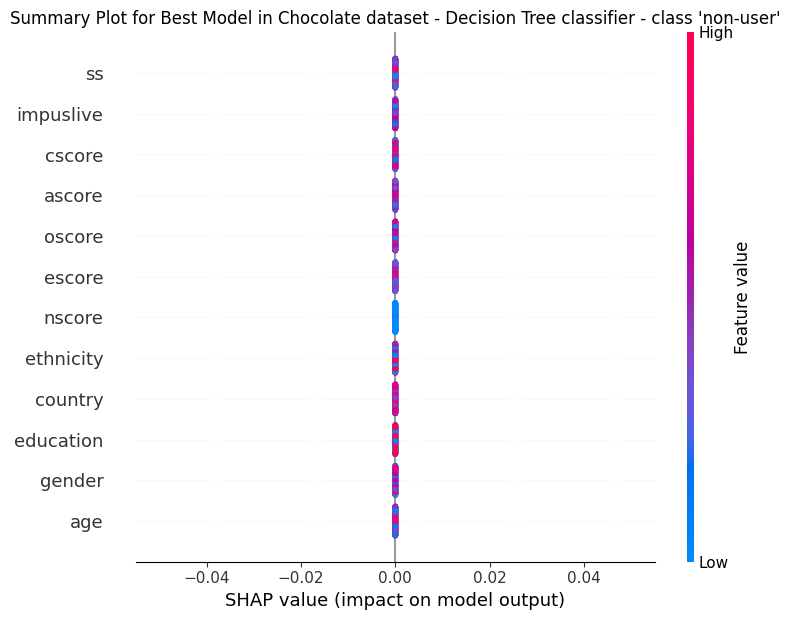

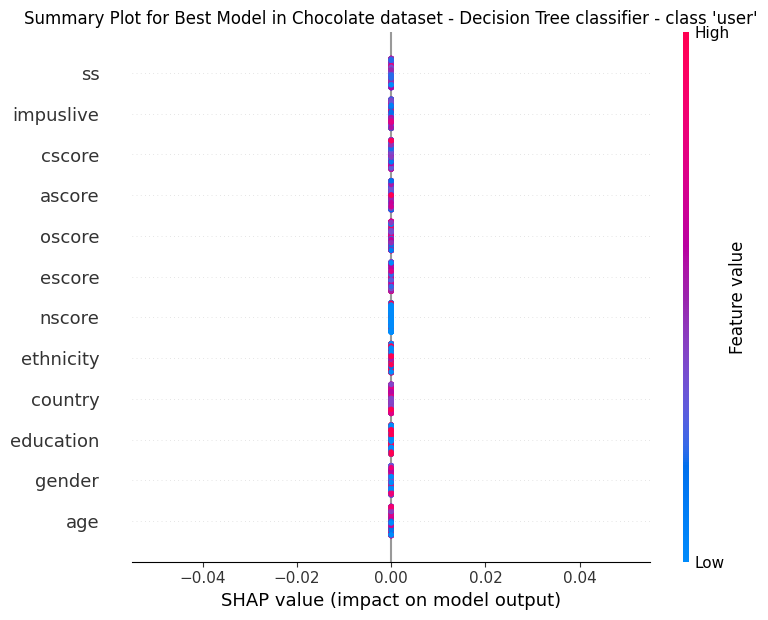

In [10]:
plot(
    X=choco_X_test,
    y=choco_y_test,
    SHAP_values=SHAP_choco_best,
    columns=columns_choco,
    title=f"Summary Plot for Best Model in Chocolate dataset - Decision Tree classifier",
    plotType="summary"
);

### Worst Model in Chocolate dataset - Support Vector Machine (SVM) classifier

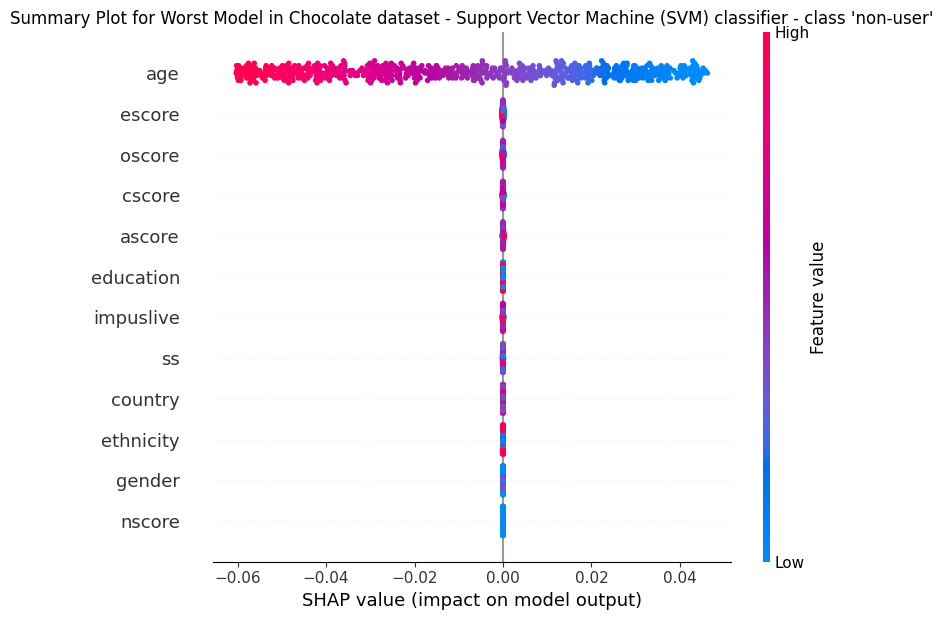

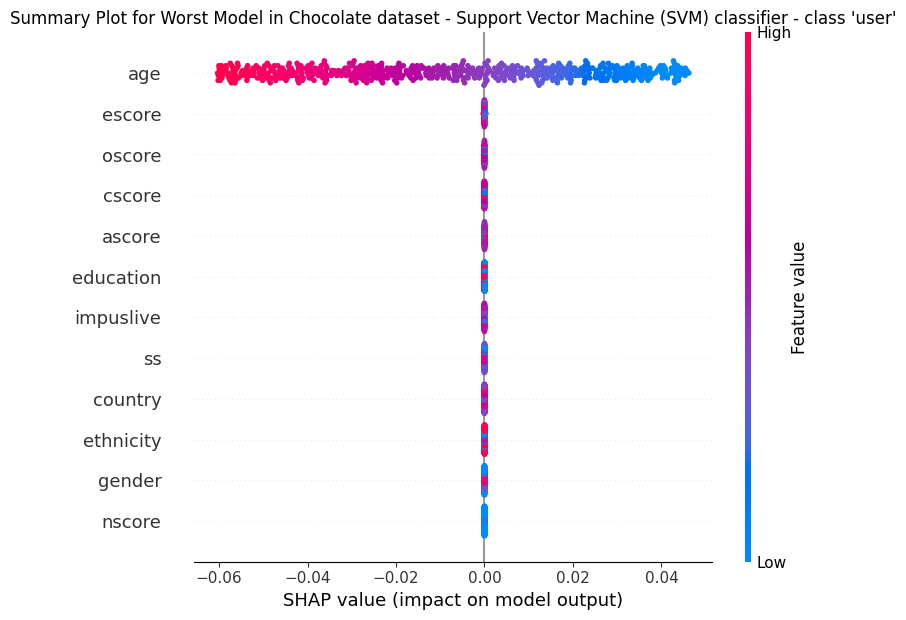

In [11]:
plot(
    X=choco_X_test,
    y=choco_y_test,
    SHAP_values=SHAP_choco_worst,
    columns=columns_choco,
    title=f"Summary Plot for Worst Model in Chocolate dataset - Support Vector Machine (SVM) classifier",
    plotType="summary"
);

### Best Model in Mushroom dataset - Multi-Layer Perceptron (MLP) classifier

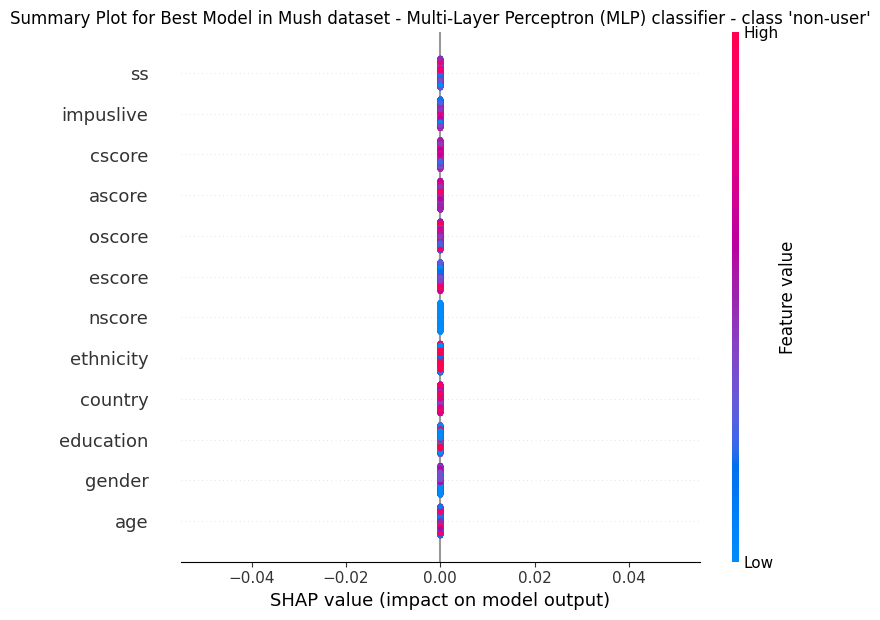

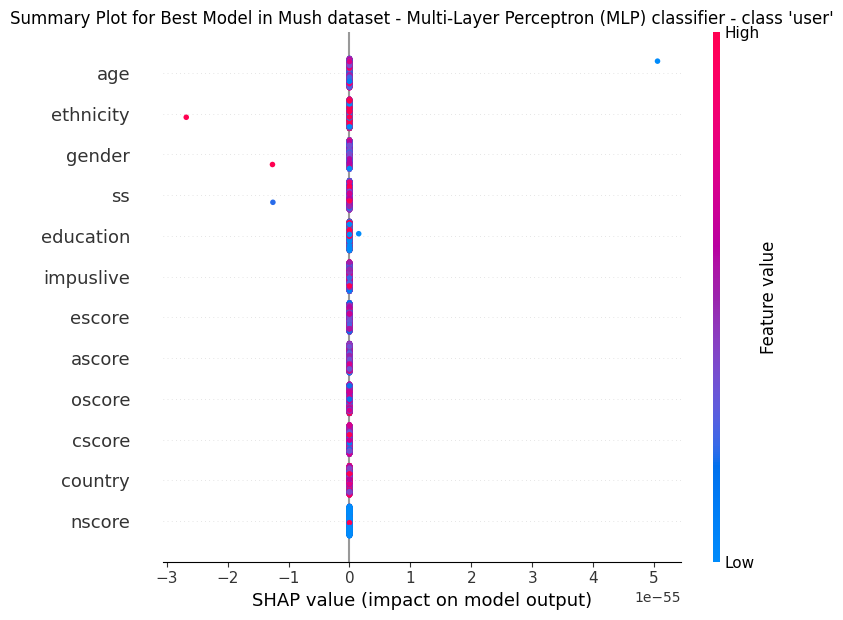

In [12]:
plot(
    X=mush_X_test,
    y=mush_y_test,
    SHAP_values=SHAP_mush_best,
    columns=columns_mush,
    title=f"Summary Plot for Best Model in Mush dataset - Multi-Layer Perceptron (MLP) classifier"
);

### Worst Model in Mushroom dataset - Support Vector Machine (SVM) classifier

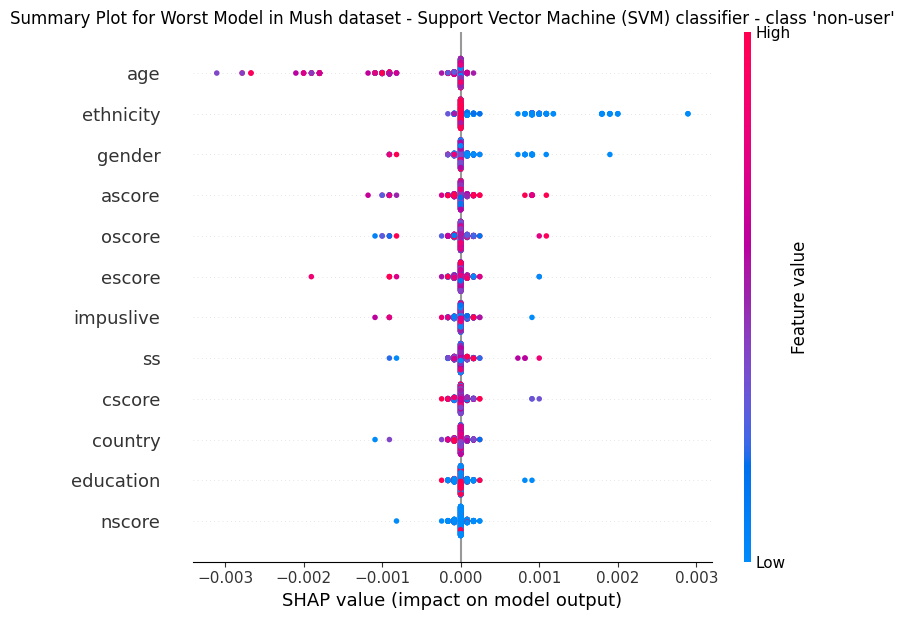

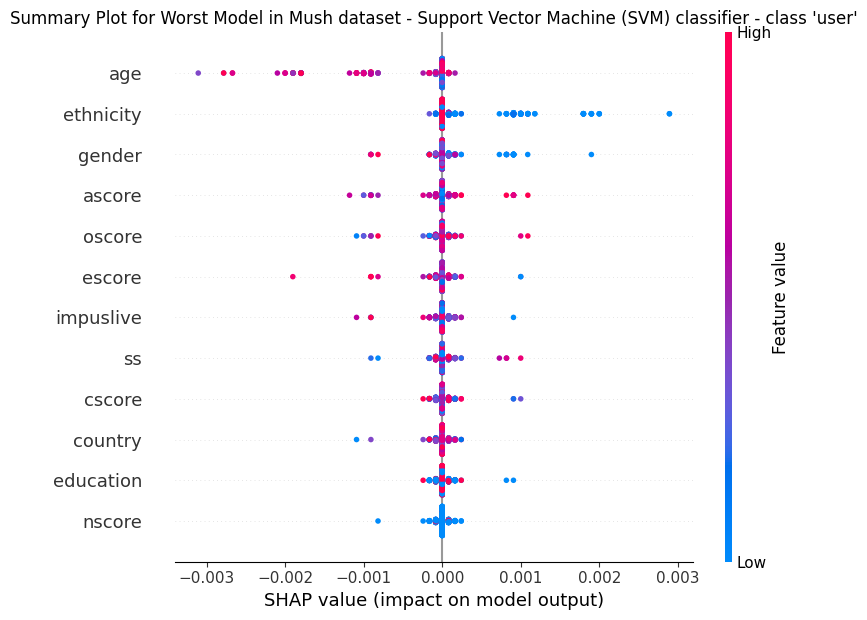

In [13]:
plot(
    X=mush_X_test,
    y=mush_y_test,
    SHAP_values=SHAP_mush_worst,
    columns=columns_mush,
    title=f"Summary Plot for Worst Model in Mush dataset - Support Vector Machine (SVM) classifier"
);

## Force Plots

In [14]:
shap.initjs()

### Load the Base Values

In [15]:
baseVal_choco_best = np.load("baseVal_choco_best.npy");
baseVal_choco_worst = np.load("baseVal_choco_worst.npy");
baseVal_mush_best = np.load("baseVal_mush_best.npy");
baseVal_mush_worst = np.load("baseVal_mush_worst.npy");

### Best Model in Chocolate dataset - Decision Tree classifier

Explaining the Model as a whole by randomly selecting 5 samples.

c:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_force_matplotlib.py:321: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_x, max_x)


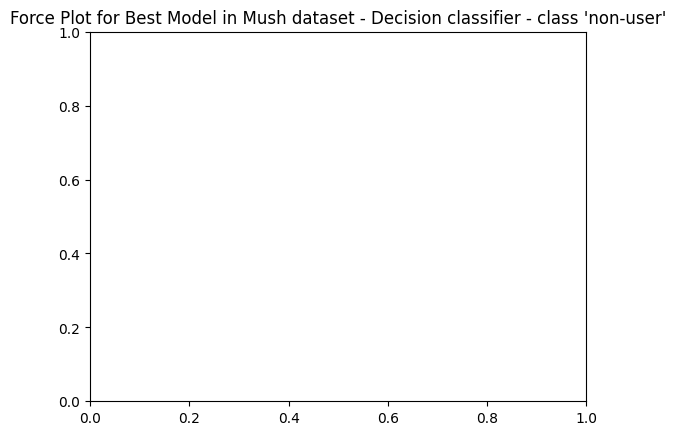

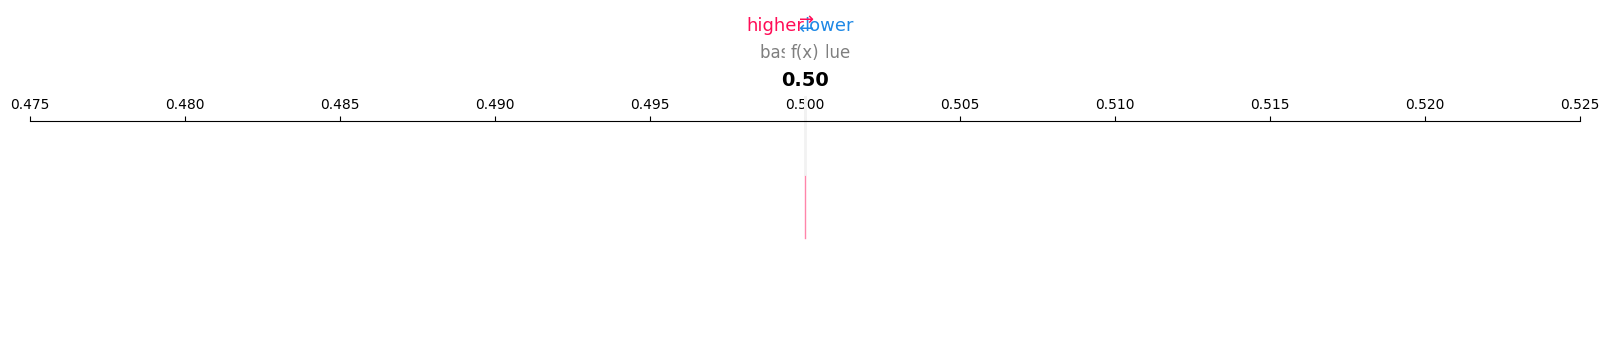

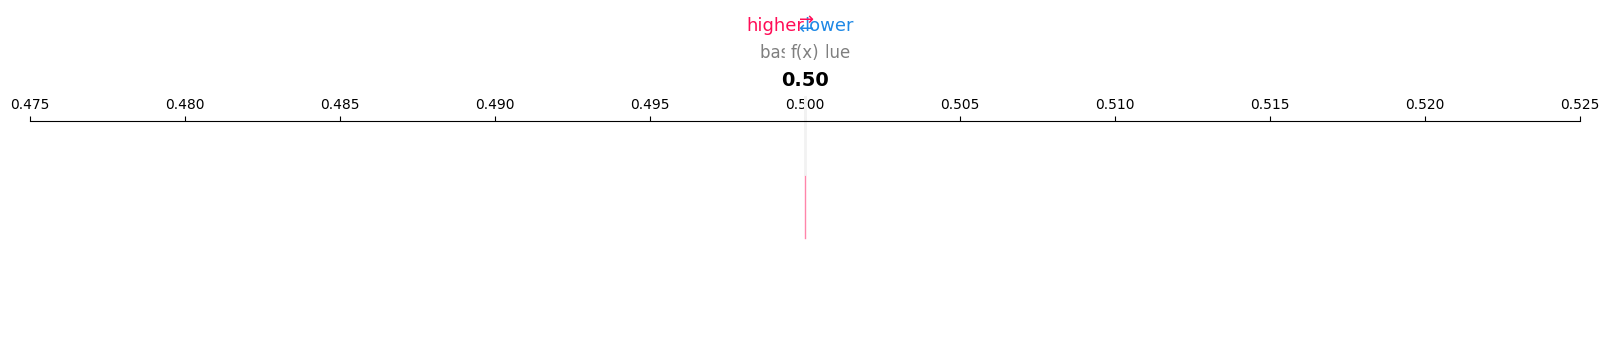

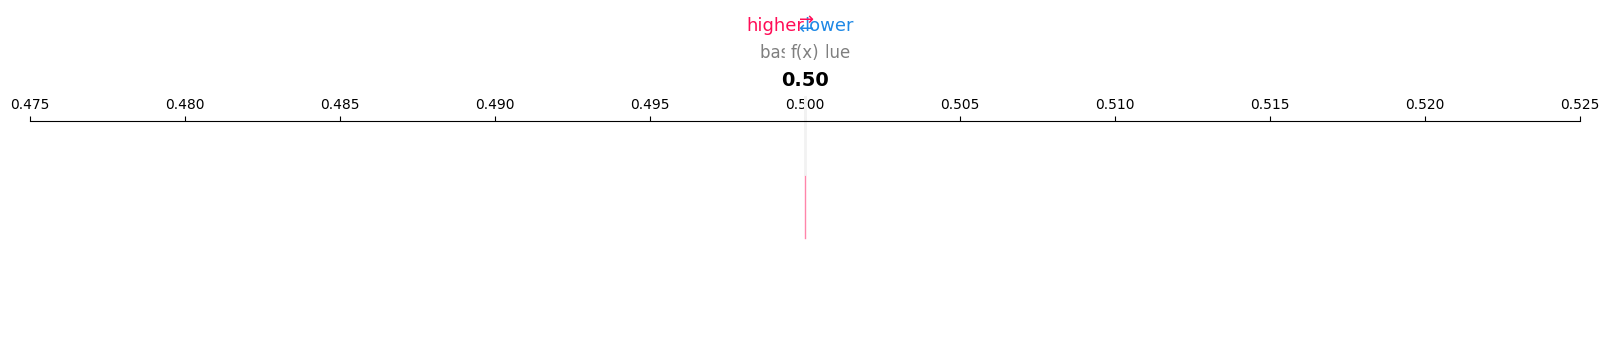

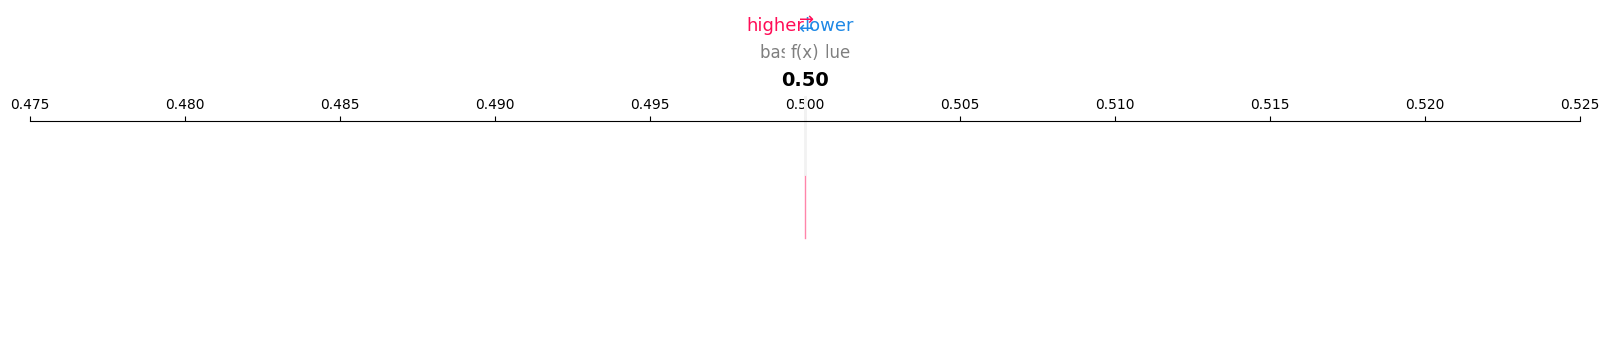

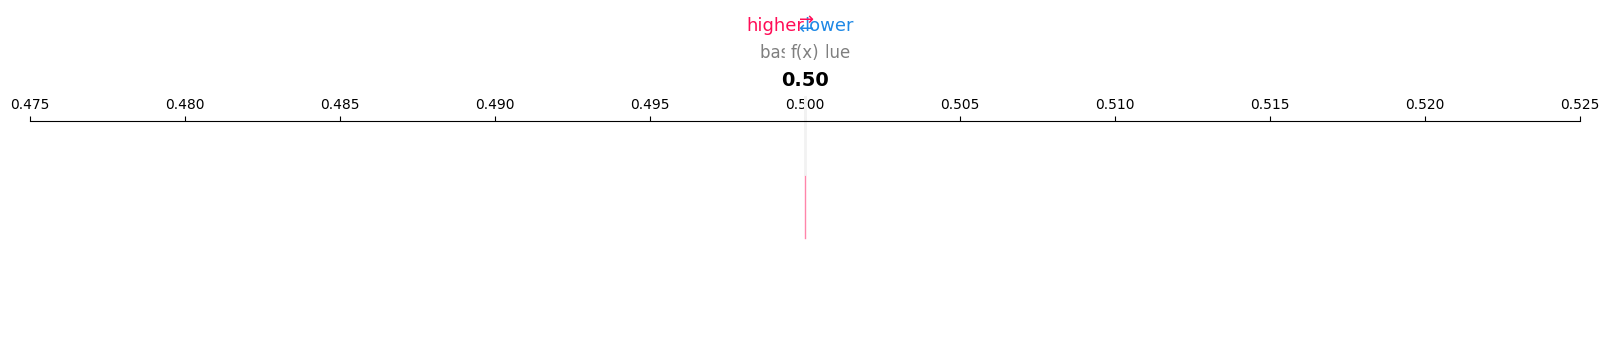

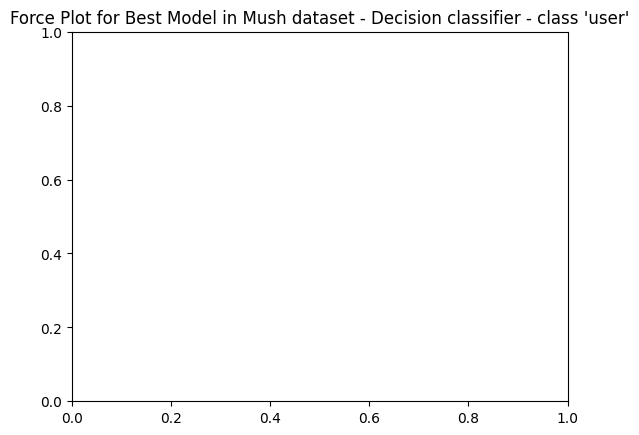

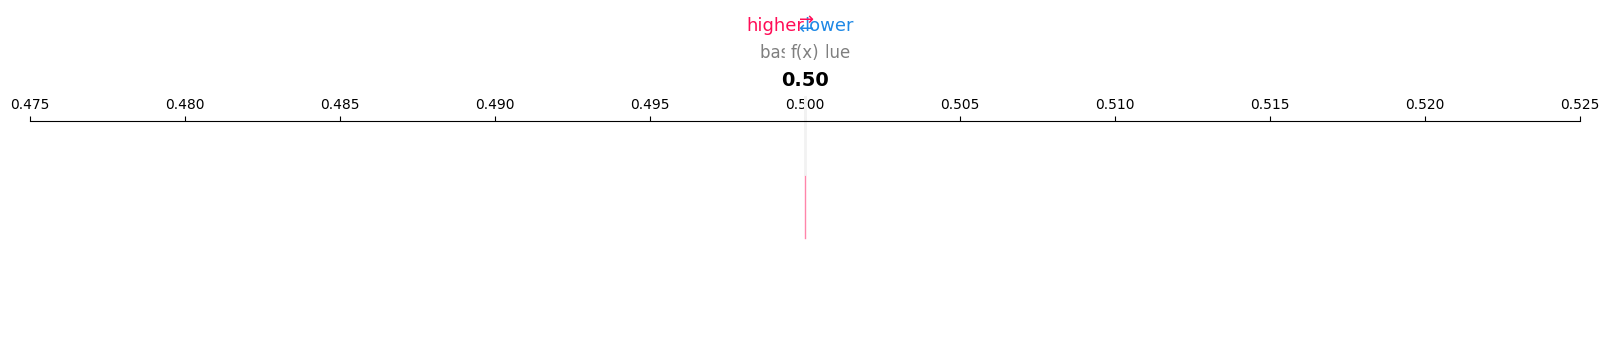

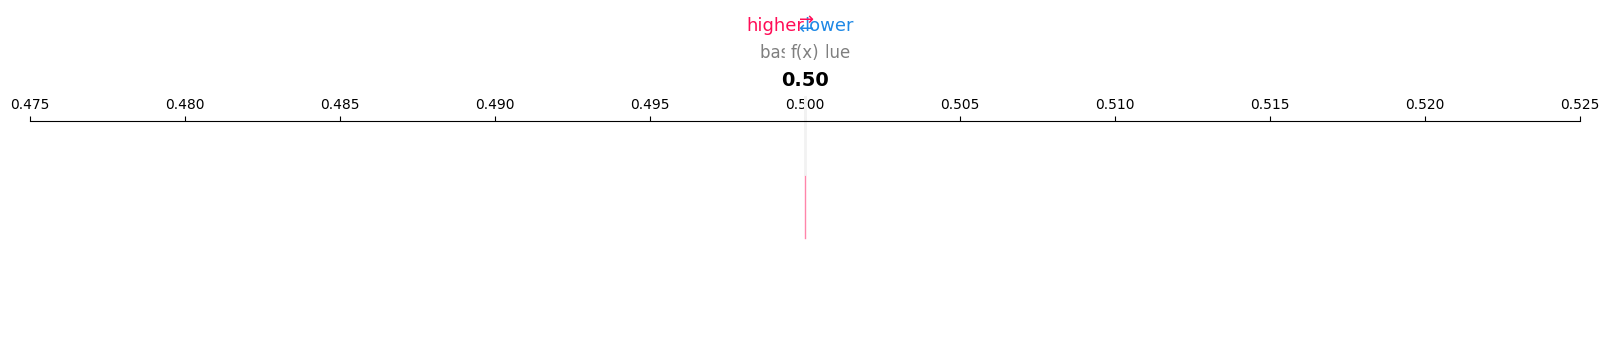

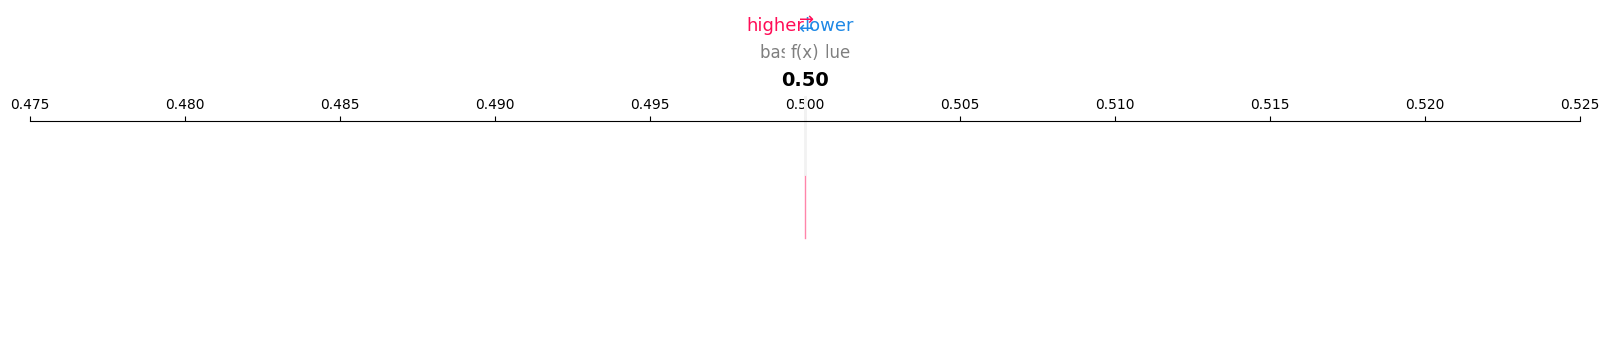

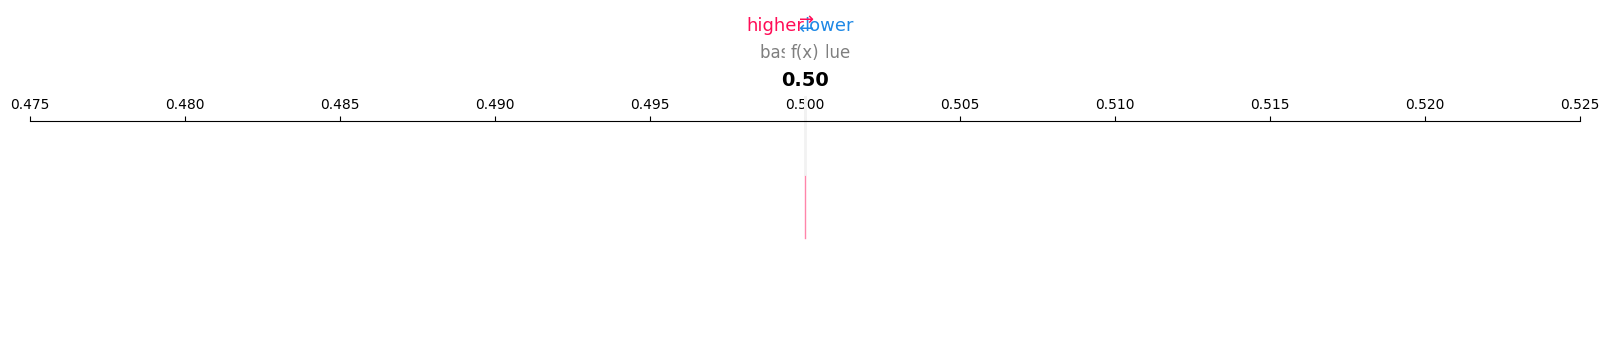

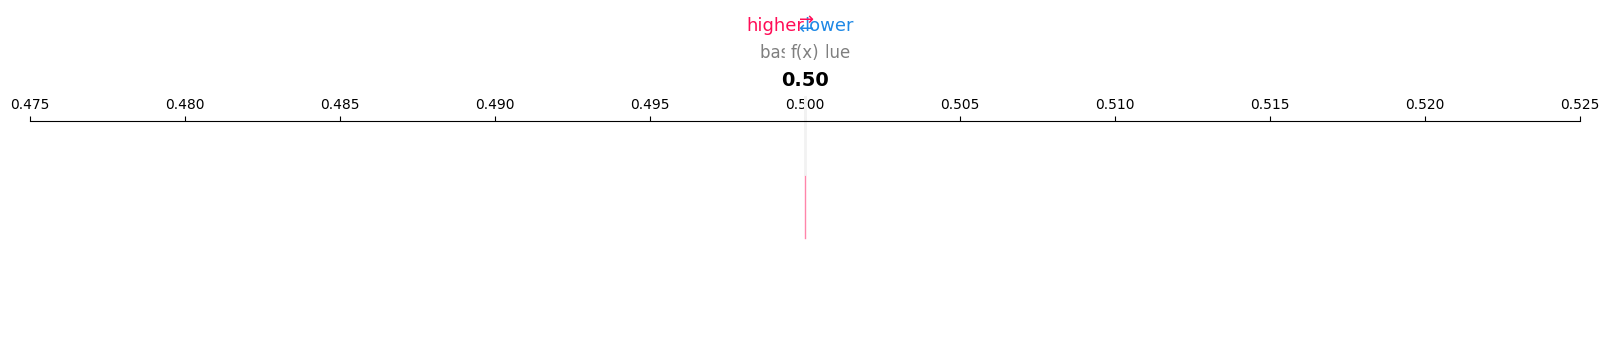

In [16]:
plot(
    X=choco_X_test,
    y=choco_y_test,
    SHAP_values=SHAP_choco_best,
    columns=columns_choco,
    baseVal=baseVal_choco_best.item(),
    plotType="force",
    title=f"Force Plot for Best Model in Mush dataset - Decision classifier",
    index_samples=5
);

Explaining this model by a single sample

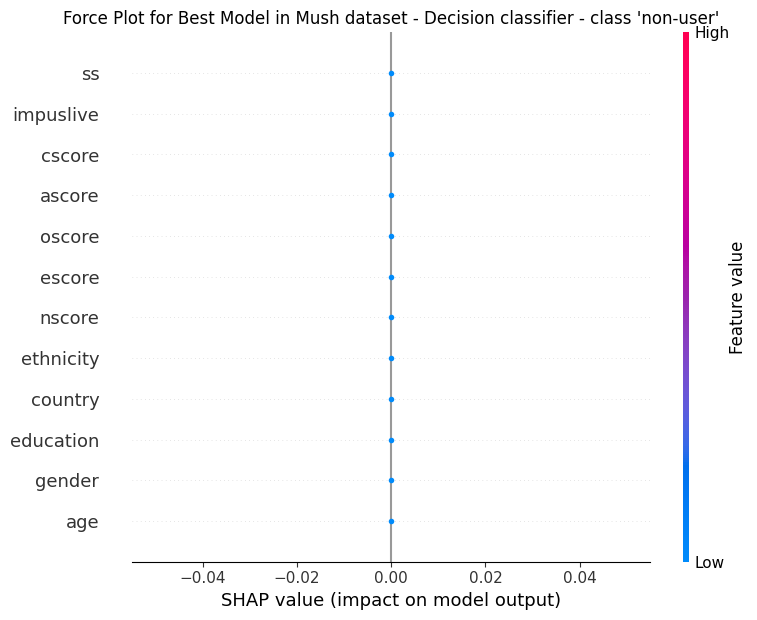

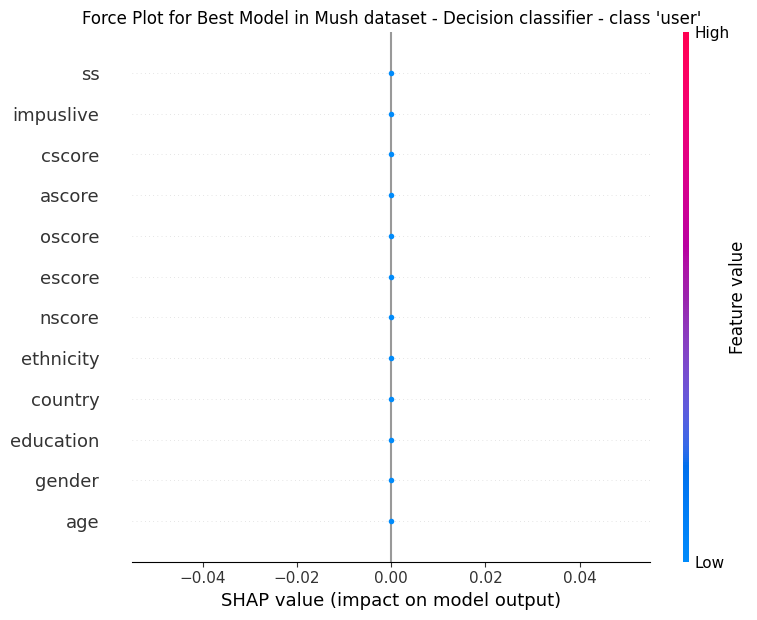

In [17]:
plot(
    X=choco_X_test,
    y=choco_y_test,
    SHAP_values=SHAP_choco_best,
    columns=columns_choco,
    baseVal=baseVal_choco_best.item(),
    title=f"Force Plot for Best Model in Mush dataset - Decision classifier",
    index_samples=1
);

### Worst Model in Chocolate dataset - Support Vector Machine (SVM) classifier

In [18]:
shap.force_plot(base_value=np.array([baseVal_choco_worst]), shap_values=SHAP_choco_worst)

### Best Model in Chocolate dataset - Multi-Layer Perceptron (MLP) classifier

In [ ]:
shap.force_plot(base_value=np.array([baseVal_mush_best]), shap_values=SHAP_mush_best)

### Worst Model in Chocolate dataset - Support Vector Machine (SVM) classifier

In [ ]:
shap.force_plot(base_value=np.array([baseVal_mush_worst]), shap_values=SHAP_mush_worst)